# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import random
import math

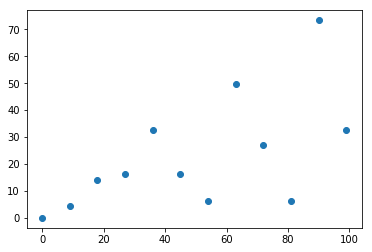

In [2]:
X = [i for i in range(0, 100, 9)]
Y_corr = [random.random()*i for i in range(0, 100, 9)]

plt.scatter(X, Y_corr)

y = 0.45 * X


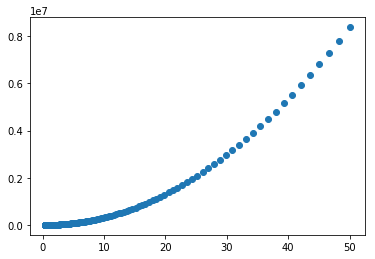

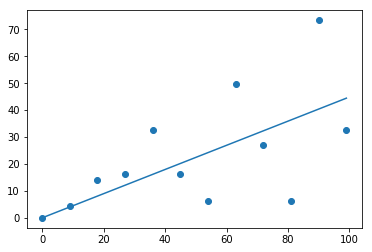

In [3]:
def train_linear(X, y, learning_rate, MAX_ITER):
    w = 50
    
    W = []
    costs = []
    
    for _ in range(MAX_ITER):
        # Hypothesis
        H = [w * x for x in X]

        # Cost function
        diff = [(H[i] - y[i])*(H[i] - y[i]) for i in range(len(X))]
        cost = sum(diff) / len(X)
        
        W.append(w)
        costs.append(cost)

        if cost < 0.0000001:
            break
        
        # Gradient descent
        grad = [(w*X[i] - y[i]) * X[i] for i in range(len(X))]
        g = sum(grad) / len(X)
        
        # update weight
        w = w - (g * learning_rate)

    print("y = %.2f * X" % w)
    
    y_pred = [w * x for x in X]
    
    plt.subplots(1,1)
    plt.scatter(W, costs)
    
    plt.subplots(1,1)
    plt.scatter(X, y)
    plt.plot(X,y_pred)
    

train_linear(X, Y_corr, 0.00001, 1000)

# Multinorminal Linear Regression

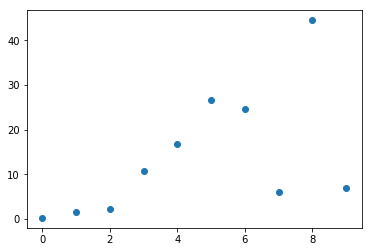

In [4]:
X = [i for i in range(10)]
Y = [random.random()*1 + random.random()*x + random.random()*(x**2) for x in X]

plt.scatter(X, Y)

Y = 1.00 + 1.00X + 1.00X^2


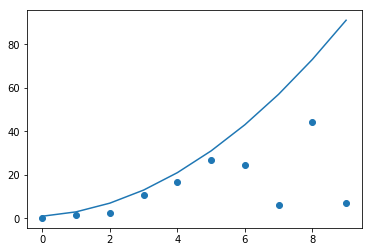

In [5]:
def make_hypothesis (weight, factors):
    h = []
    
    for x in factors:
        v = 0
        for i in range(len(weight)):
            v += weight[i]*(x**i)
        h.append(v)
        
    return h


def calc_cost(hypo, weight, factors, corrects):
    H = hypo(weight, factors)
    
    errors = [H[i] - corrects[i] for i in range(len(corrects))]
    return sum([err**2 for err in errors]) / len(errors)
    

def update_weight(hypothesis, W, X, Y, cost_func, learning_rate):
    d = 1e-9
    
    grad = []
    for i in range(len(W)):
        re_W = [W[j] + (d if j == i else 0) for j in range(len(W))]
        g = cost_func(hypothesis, W, X, Y) - cost_func(hypothesis, re_W, X, Y) / W[i] - re_W[i]
        grad.append(g)
    
    new_W = []
    for i in range(len(W)):
        new_W.append(W[i] - learning_rate*grad[i])

    return new_W

def train(hypothesis, X, Y, learning_rate, MAX_ITER):
    w = [random.random() for i in range(3)]
    
    for _ in range(MAX_ITER):
        cost = calc_cost(hypothesis, w, X, Y)
        if cost < 0.00000001:
            break
        w = update_weight(hypothesis, w, X, Y, calc_cost, learning_rate)
    
    H = hypothesis(w, X)
    
    plt.scatter(X, Y)
    plt.plot(X, H)
    
    print("Y = %.2f + %.2fX + %.2fX^2" % (w[0], w[1], w[2]))

train(make_hypothesis, X, Y, 0.0001, 10000)